<a href="https://colab.research.google.com/github/tamarasessink/Master_Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tamarasessink/Master_Thesis.git

Cloning into 'Master_Thesis'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 256 (delta 26), reused 39 (delta 18), pack-reused 205
Receiving objects: 100% (256/256), 507.08 KiB | 1.88 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [9]:
import torch
torch.cuda.empty_cache()

In [ ]:
import torch
model = torch.load('/content/checkpoint_0000.pth.tar', map_location='cpu')
print(model)

{'epoch': 1, 'arch': 'resnet50', 'state_dict': OrderedDict([('module.queue', tensor([[-0.1885, -0.1864, -0.1856,  ..., -0.1898, -0.1623, -0.1729],
        [ 0.0964,  0.0155,  0.0286,  ...,  0.0033, -0.0655,  0.0750],
        [ 0.0656,  0.0905,  0.0953,  ...,  0.1015,  0.1236,  0.0729],
        ...,
        [-0.1036, -0.1060, -0.1139,  ..., -0.1028, -0.0904, -0.1115],
        [ 0.1567,  0.1320,  0.1406,  ...,  0.1008,  0.0820,  0.1578],
        [ 0.1212,  0.1433,  0.1267,  ...,  0.1375,  0.1906,  0.1015]])), ('module.queue_ptr', tensor([3072])), ('module.encoder_q.conv1.weight', tensor([[[[ 2.5702e-02,  5.6902e-02,  8.2494e-02,  ...,  5.8239e-02,
            5.0325e-02,  8.9318e-02],
          [ 1.0900e-01,  5.2887e-02,  5.4955e-02,  ...,  8.9962e-02,
            6.3472e-02,  1.0593e-01],
          [ 7.7601e-02,  6.3080e-02,  6.8413e-02,  ...,  6.6245e-02,
            8.9524e-02,  3.9641e-02],
          ...,
          [ 4.7562e-02,  5.6000e-02,  2.8433e-02,  ...,  7.1702e-02,
          

In [ ]:
!!python /content/Master_Thesis/downstream_task.py 

^C


['2023-04-06 15:06:57.465182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.',
 'To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.',
 '2023-04-06 15:06:58.429304: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT',
 'Traceback (most recent call last):',
 '  File "/content/Master_Thesis/downstream_task.py", line 128, in <module>',
 '    my_object.process_images_train()',
 '  File "/content/Master_Thesis/data.py", line 82, in process_images_train',
 '    plt.imsave(directory + image_num, image)',
 '  File "/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py", line 2200, in imsave',
 '    return matplotlib.image.imsave(fname, arr, **kwargs)',
 '  File "/usr/local/lib/python3.9/dist-packages/matplotlib/image.py", line 1689, in imsave',
 '    ima

In [22]:
!python /content/Master_Thesis/main_moco.py \
  --lr 0.015 \
  --batch-size 64 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-04-19 11:38:54.093953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 11:38:55.286956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-19 11:39:00.664994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Use GPU: 0 for training
=> creating model 'SmaAt_UNet_pre(
  (inc): DoubleConvDS(
    (double_conv): Sequential(
      (0): DepthwiseSeparableConv(
        (depthwise): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3)
        (pointwise): Conv2d(6, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [ ]:
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 256 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \


Streaminguitvoer ingekort tot de laatste 5000 regels.
2023-03-25 02:24:40.346022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-25 02:24:40.346126: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-25 02:24:40.346146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-25 02:24:44.247293: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could no

In [ ]:
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 256 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

2023-03-27 20:11:21.641595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 20:11:21.799859: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-27 20:11:22.710797: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-27 20:11:22.710898: W tensorflow/compiler/xla/stream_executor

In [ ]:
!python /content/Master_Thesis/main_moco.py \
  -a resnet50 \
  --lr 0.10 \
  --batch-size 128 \
  --mlp --moco-t 0.2 --aug-plus --cos \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \

Traceback (most recent call last):
  File "/content/Master_Thesis/main_moco.py", line 31, in <module>
    from models.SmaAt_UNet import SmaAt_UNet
ModuleNotFoundError: No module named 'models'


In [27]:
!python /content/Master_Thesis/downstream_task.py \

2023-04-19 14:17:00.351238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 14:17:01.266562: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=> loading checkpoint '/content/checkpoint_0008.pth.tar'
module.queue
module.queue_ptr
module.encoder_q.inc.double_conv.0.depthwise.weight
module.encoder_q.inc.double_conv.0.depthwise.bias
module.encoder_q.inc.double_conv.0.pointwise.weight
module.encoder_q.inc.double_conv.0.pointwise.bias
module.encoder_q.inc.double_conv.1.weight
module.encoder_q.inc.double_conv.1.bias
module.encoder_q.inc.double_conv.1.running_mean
module.encoder_q.inc.double_conv.1.running_var
module.encoder_q.inc.double_conv.1.num_batches_tracked
module.encoder_q.inc.double_conv.

In [ ]:
!pip uninstall torchvision
!pip install --upgrade -U torchvision -f https://data.pyg.org/whl/torch-0.14.2+cu117.html


Found existing installation: torchvision 0.14.1+cu116
Uninstalling torchvision-0.14.1+cu116:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/torchvision-0.14.1+cu116.dist-info/*
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libcudart.a44f4c9b.so.11.0
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libnvjpeg.5afee195.so.11
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.8/dist-packages/torchvision.libs/libz.1328edc3.so.1
    /usr/local/lib/python3.8/dist-packages/torchvision/*
Proceed (Y/n)? Y
  Successfully uninstalled torchvision-0.14.1+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-0.14.2+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 59.3 MB/s eta 0:00:00


NameError: ignored

(5734, 18, 288, 288)
[[0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
 [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
 [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00020907 0.00020907 0.00020907]
 [0.         0.         0.         ... 0.00020907 0.00020907 0.00020907]
 [0.         0.         0.         ... 0.00020907 0.00020907 0.00020907]]
[[5.1 5.1 5.1 ... 0.  0.  0. ]
 [5.1 5.1 5.1 ... 0.  0.  0. ]
 [5.1 5.1 5.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 5.1 5.1 5.1]
 [0.  0.  0.  ... 5.1 5.1 5.1]
 [0.  0.  0.  ... 5.1 5.1 5.1]]
<PIL.Image.Image image mode=L size=288x288 at 0x7F9AD86A8D60>


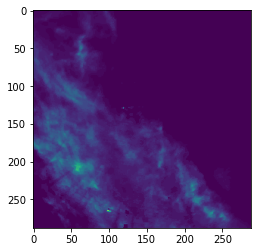

In [ ]:
import pylab as plt
import numpy as np
import h5py
from PIL import Image

f = h5py.File('/content/drive/MyDrive/train_test_2016-2019_input-length_12_img-ahead_6_rain-threshhold_50.h5', "r")
traindir = f['/train/images']
print(traindir.shape)
test = np.reshape(traindir[4][17:], (288,288))
print(test)
# Assuming the tensor values are in the range [min_val, max_val]
min_val = np.min(test)
max_val = np.max(test)
test = (test - min_val) / (max_val - min_val) * 255.0
print(test)
# test = test*10000

image = Image.fromarray(np.uint8(test))
print(image)
image.save("test.jpeg")
# image.open("test.jpeg")
plt.imshow(image)

In [ ]:
!git push https://github.com/tamarasessink/Master_Thesis.git

fatal: not a git repository (or any of the parent directories): .git


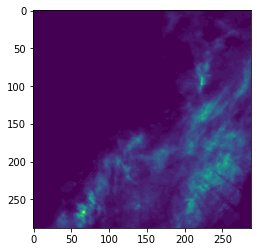

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
# after agmentation
image = Image.fromarray(np.uint8(test))

transform = transforms.RandomHorizontalFlip(p=0.8)
img = transform(image)
plt.imshow(img)

mean and std before normalize:
Mean of the image: tensor([0.0619])
Std of the image: tensor([0.0852])


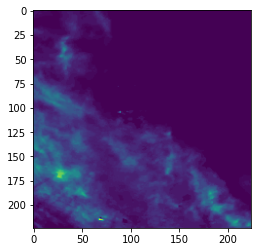

In [ ]:
import torch
import torchvision.transforms as transforms
# we only have 1 not 3 dimensions per image thus only 1 mean and std
transform = transforms.Compose([
    transforms.ToTensor()
])
# get tensor image
img_tr = transform(image)
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)


normalize = transforms.Normalize(mean=[0.0188],
                                     std=[0.0278])
augmentation = [transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomGrayscale(p=0.2),
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), normalize]
aug = transforms.Compose(augmentation)
img = aug(image)
test2 =  torch.squeeze(img,0)
plt.imshow(test2)

